In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Upload the dataset into the file and read the file to see how the data looks, since it did not have headers, have to write column details
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
# we see that class is have an alphabet, so inorder to check class values, we have to run the below code
# g means gamma and h means hadron
df["class"].unique()

array(['g', 'h'], dtype=object)

In [ ]:
# this converts g and h as 0 and 1 i.e change in the datatype
df["class"] = (df["class"] == "g").astype(int)

In [ ]:
# to see the change in how the class is shown, gamma has 1
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

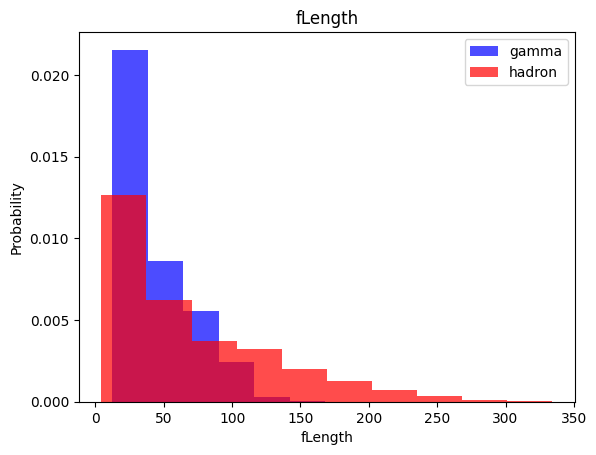

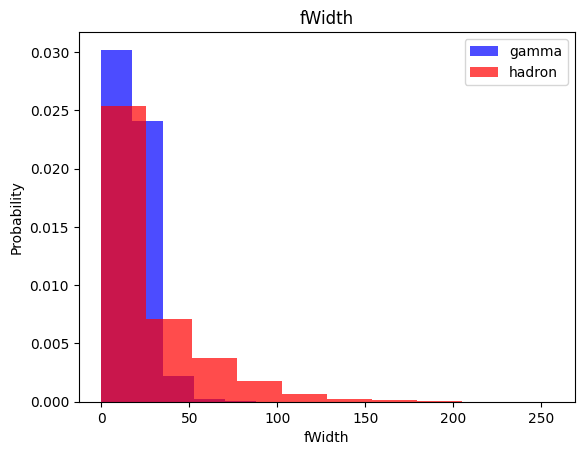

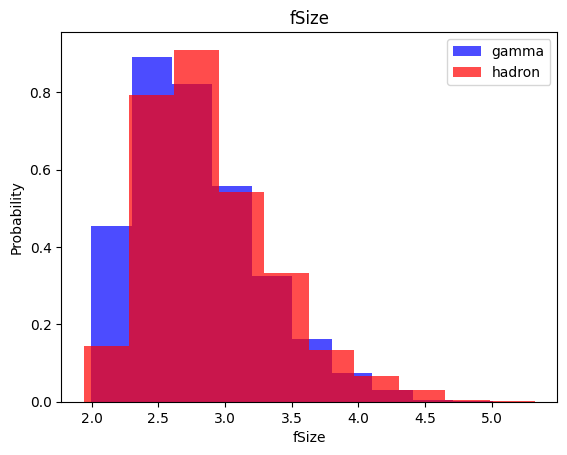

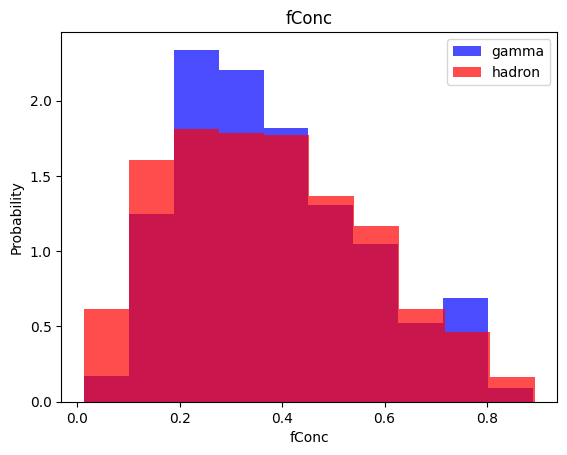

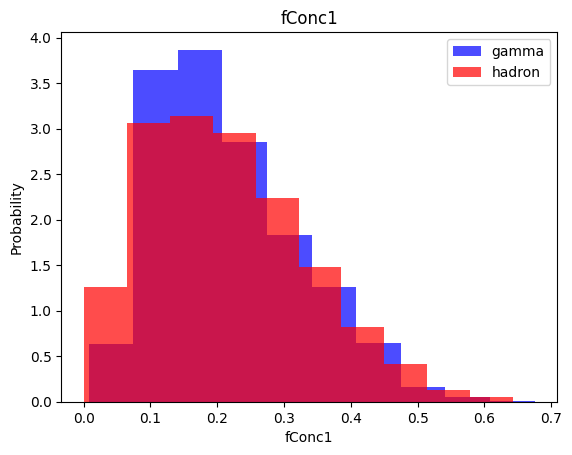

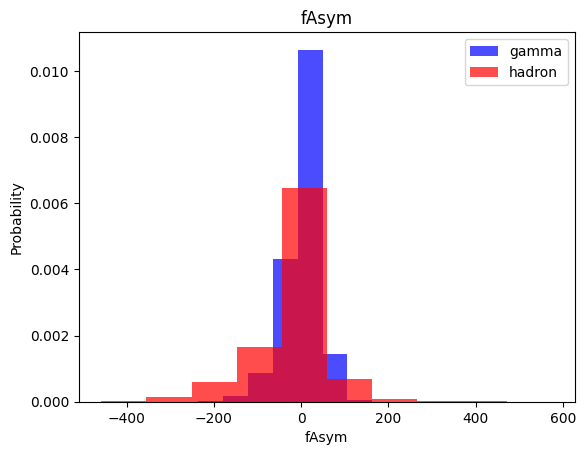

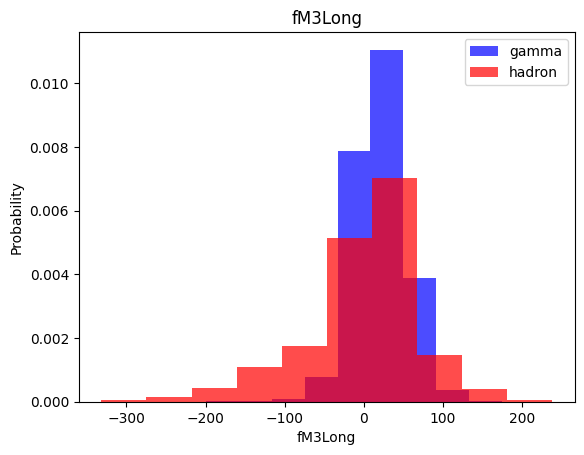

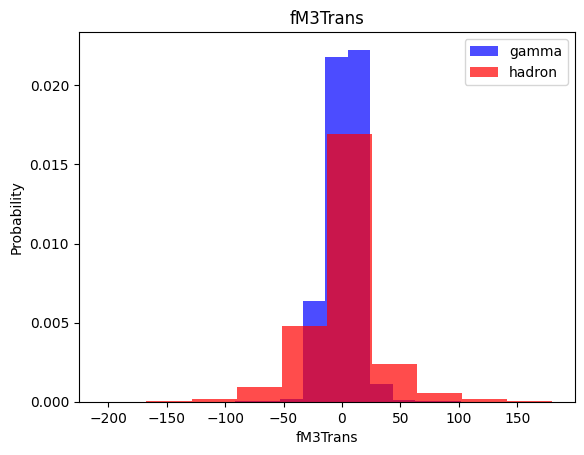

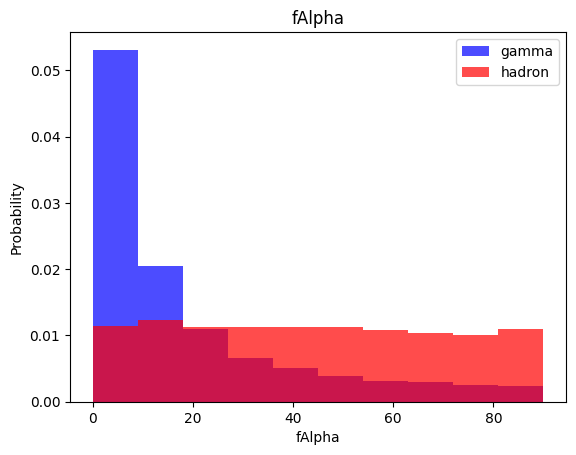

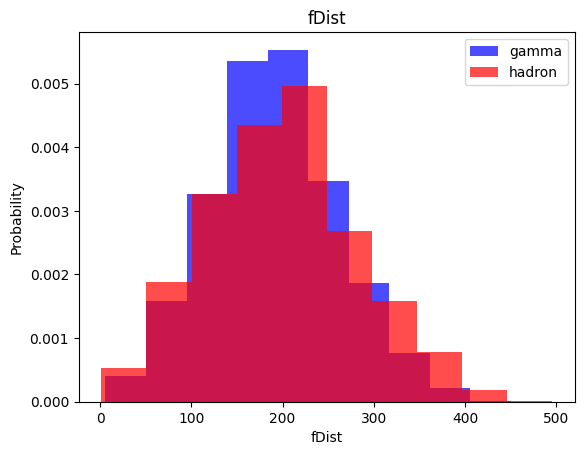

In [ ]:
# Plotting a histogram to understand the distribution of the class with respect to different features. Which is like a correclation between class and different features.
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label], color = 'blue',label = 'gamma', alpha = 0.7, density = True)
  plt.hist(df[df["class"] == 0][label], color = 'red',label = 'hadron', alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
# Inorder to perform the Supervised learning task, we have to first, split the data for training, validation and test
train,valid,test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(Dataframe, oversample = False):
  X = Dataframe[Dataframe.columns[:-1]].values
  y = Dataframe[Dataframe.columns[-1]].values
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample :
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X,y)
  # stack the whole data into a 2d numpy
  data = np.hstack((X, np.reshape(y,(len(y),1))))
  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample= True)
valid, X_valid, y_valid = scale_dataset(valid, oversample= False)
test, X_test, y_test = scale_dataset(test, oversample= False)

In [ ]:
len(y_train == 1)

14796

In [ ]:
sum(y_train == 0)

7398

# **K Nearest Neighbors Prediction Implementation**


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
# the negihbors can be changed to any possible value to check accuracy improvement
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)


In [ ]:
y_pred

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
y_test

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      1327
           1       0.86      0.87      0.86      2477

    accuracy                           0.82      3804
   macro avg       0.81      0.80      0.81      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes Prediction Model


In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.40      0.50      1327
           1       0.74      0.90      0.81      2477

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



# Logistic Regression prediction Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1327
           1       0.84      0.82      0.83      2477

    accuracy                           0.79      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# Support Vector Machines predication Model

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1327
           1       0.89      0.90      0.89      2477

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Network Classification Model

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# Without defining the train_model for epochs, batch_size,etc
# def plot_loss(history):
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label='val_loss')
# plt.xlabel('Epoch')
# plt.ylabel('Binary crossentropy')
# plt.legend()
# plt.grid(True)
# plt.show()

# With train_model defined, below is the code for plotting the accuracy
def plot_history(history):
  fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  plt.show()

In [ ]:
# Without defining the train_model for epochs, batch_size,etc
#def plot_loss(history):
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label='val_loss')
#plt.xlabel('Epoch')
# plt.ylabel('Binary crossentropy')
 #plt.legend()
# plt.grid(True)
# plt.show()
#def plot_accuracy(history):
 # plt.plot(history.history['accuracy'], label = 'accuracy')
 # plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
 # plt.xlabel('Epoch')
 # plt.ylabel('Accuracy')
 # plt.legend()
 # plt.grid(True)
 # plt.show()

In [ ]:
#  For a basic Neural Network model trainig, we can use the below code
#nm_model = tf.keras.Sequential([
#     tf.keras.Input(shape=(10,)),
#   tf.keras.layers.Dense(32, activation='relu'),
#   tf.keras.layers.Dense(32, activation='relu'),
#   tf.keras.layers.Dense(1, activation='sigmoid')])
#nm_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# For A little advanced training, we can use the below code

def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nm_model = tf.keras.Sequential([
    tf.keras.Input(shape=(10,)),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  nm_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
# After defining the train model we have to fit the model within the program

  history = nm_model.fit(X_train, y_train, epochs= epochs, batch_size= batch_size ,validation_split= 0.2, verbose=0)
  return nm_model, history

In [ ]:
# the below history is for basic model:
#history = nm_model.fit(X_train, y_train, epochs=100, batch_size=32,validation_split= 0.2, verbose=0)
#plot_loss(history)
# plot_accuracy(history)

Training with 16 nodes, dropout 0, learning rate 0.01 and batch size 32...


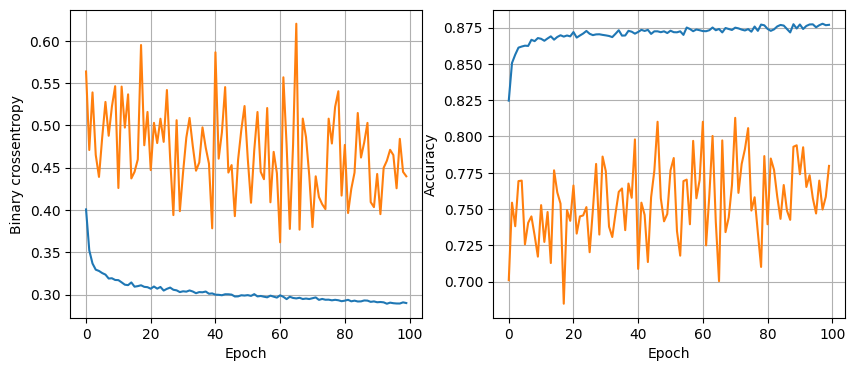

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8792 - loss: 0.2980
Training with 16 nodes, dropout 0, learning rate 0.01 and batch size 64...


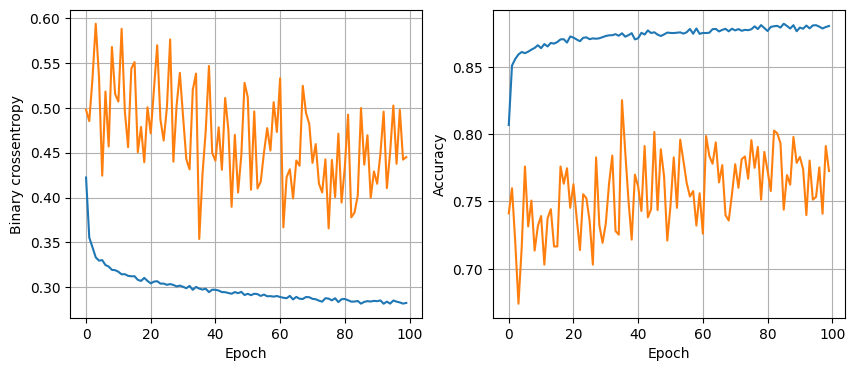

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8855 - loss: 0.3018
Training with 16 nodes, dropout 0, learning rate 0.01 and batch size 128...


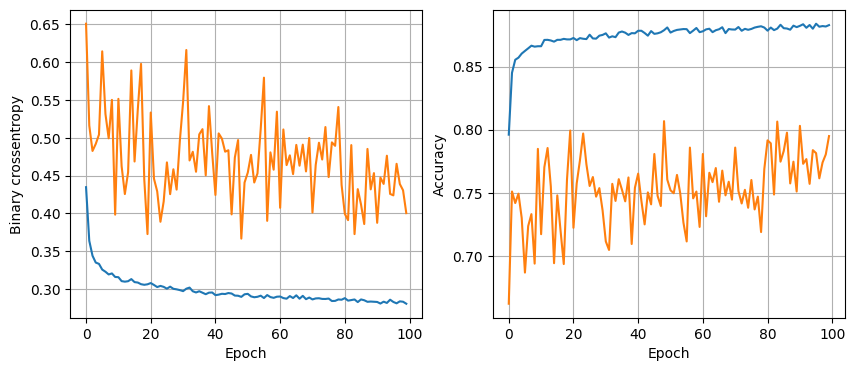

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8790 - loss: 0.2962
Training with 16 nodes, dropout 0, learning rate 0.005 and batch size 32...


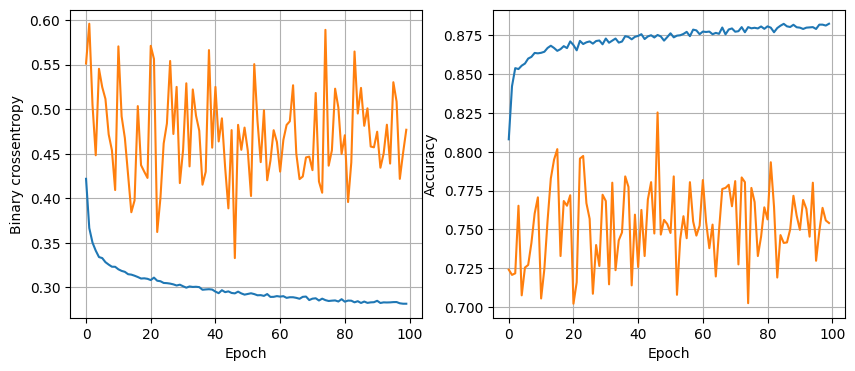

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8783 - loss: 0.2959
Training with 16 nodes, dropout 0, learning rate 0.005 and batch size 64...


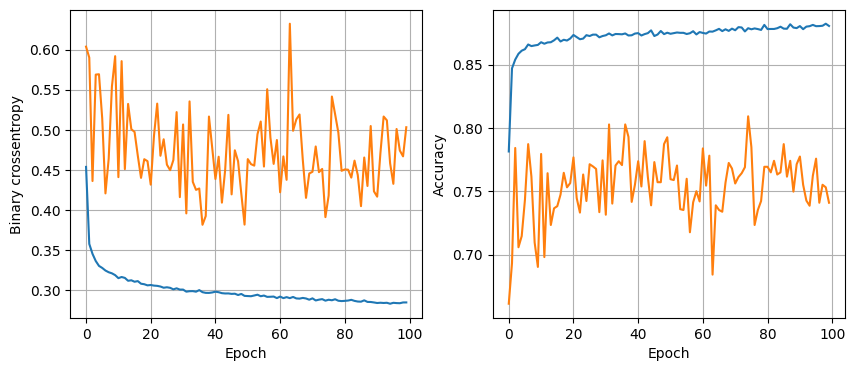

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8858 - loss: 0.3004
Training with 16 nodes, dropout 0, learning rate 0.005 and batch size 128...


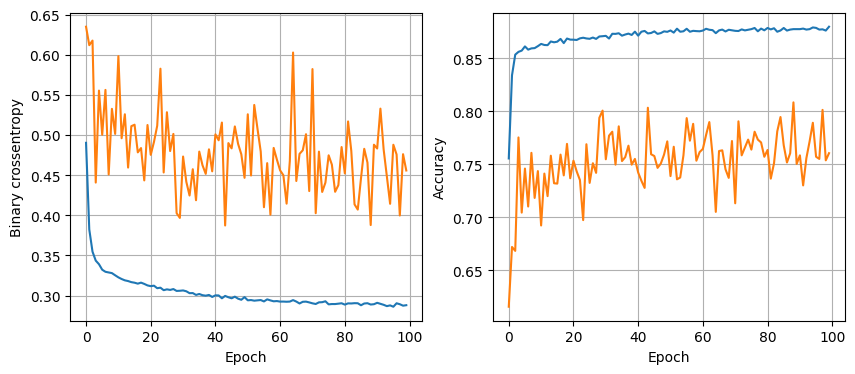

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8784 - loss: 0.3034
Training with 16 nodes, dropout 0, learning rate 0.001 and batch size 32...


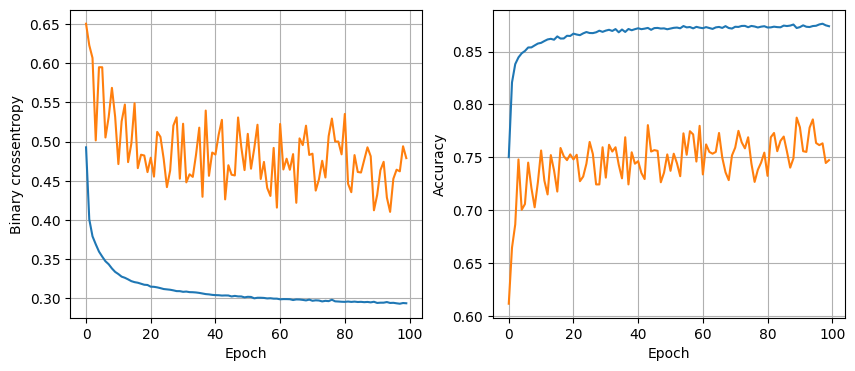

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8835 - loss: 0.2933
Training with 16 nodes, dropout 0, learning rate 0.001 and batch size 64...


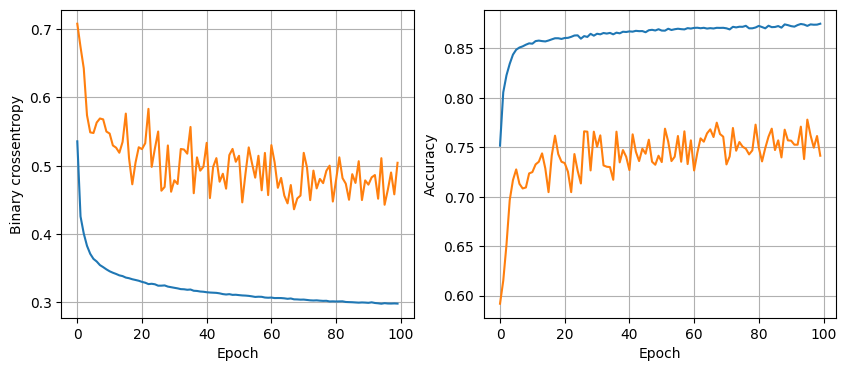

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8790 - loss: 0.2939
Training with 16 nodes, dropout 0, learning rate 0.001 and batch size 128...


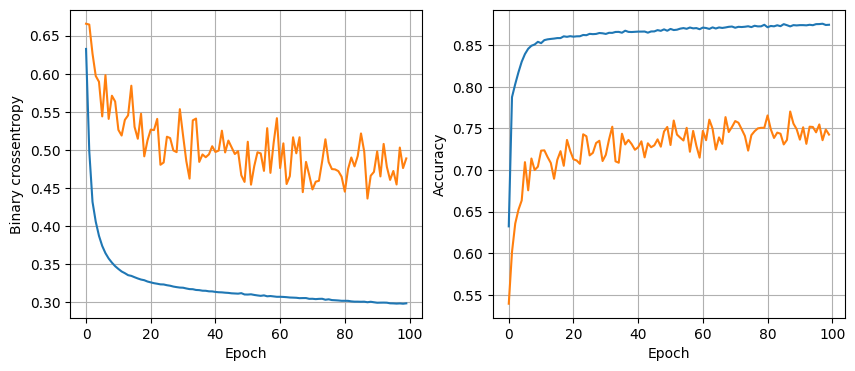

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8811 - loss: 0.2917
Training with 16 nodes, dropout 0.2, learning rate 0.01 and batch size 32...


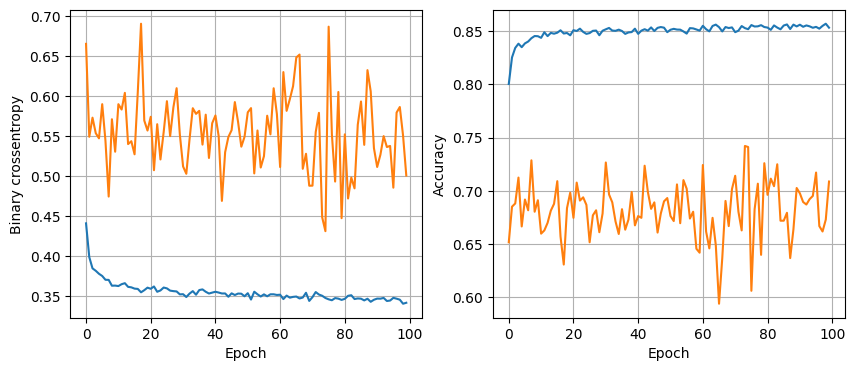

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8833 - loss: 0.2894
Training with 16 nodes, dropout 0.2, learning rate 0.01 and batch size 64...


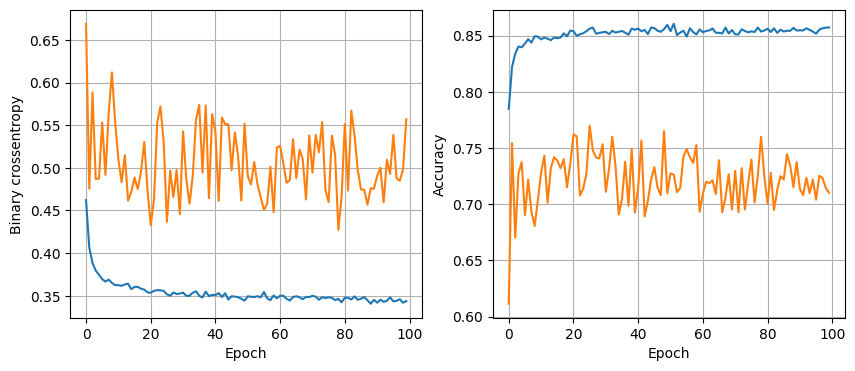

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8828 - loss: 0.2994
Training with 16 nodes, dropout 0.2, learning rate 0.01 and batch size 128...


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8812 - loss: 0.2955
Training with 16 nodes, dropout 0.2, learning rate 0.005 and batch size 32...


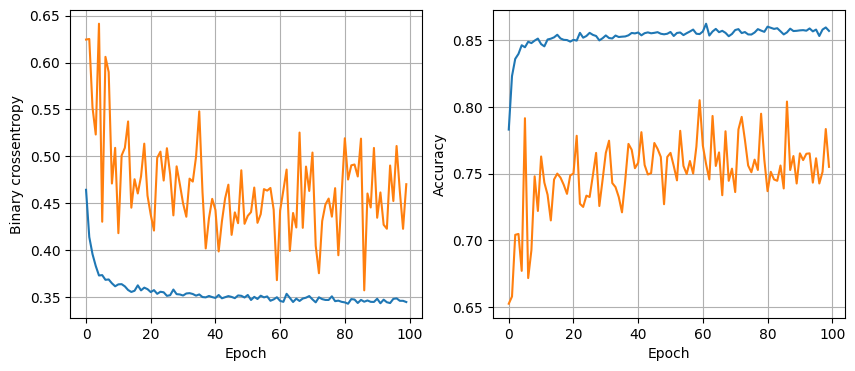

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8762 - loss: 0.3091
Training with 16 nodes, dropout 0.2, learning rate 0.005 and batch size 64...


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8843 - loss: 0.3004
Training with 16 nodes, dropout 0.2, learning rate 0.005 and batch size 128...


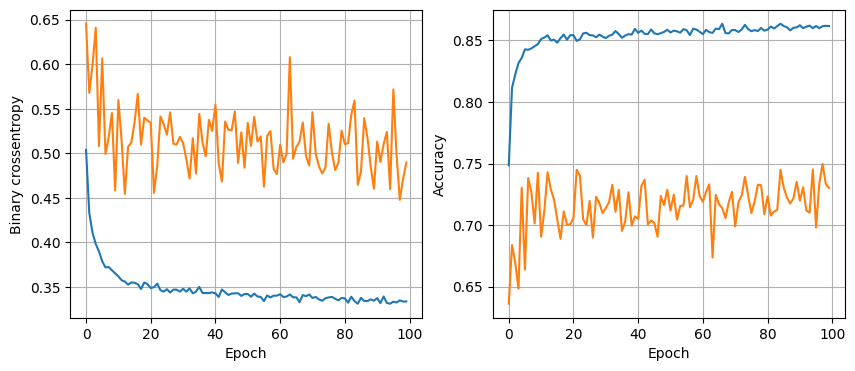

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8837 - loss: 0.2855
Training with 16 nodes, dropout 0.2, learning rate 0.001 and batch size 32...


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8792 - loss: 0.2969
Training with 16 nodes, dropout 0.2, learning rate 0.001 and batch size 64...


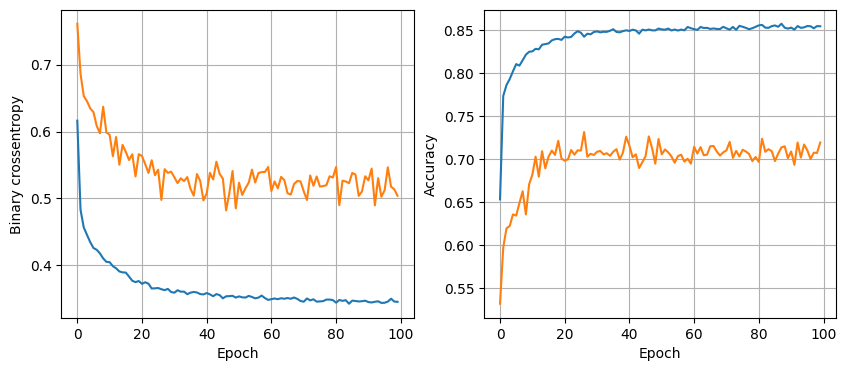

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8777 - loss: 0.3027
Training with 16 nodes, dropout 0.2, learning rate 0.001 and batch size 128...


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8766 - loss: 0.2985
Training with 32 nodes, dropout 0, learning rate 0.01 and batch size 32...


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8789 - loss: 0.3243
Training with 32 nodes, dropout 0, learning rate 0.01 and batch size 64...


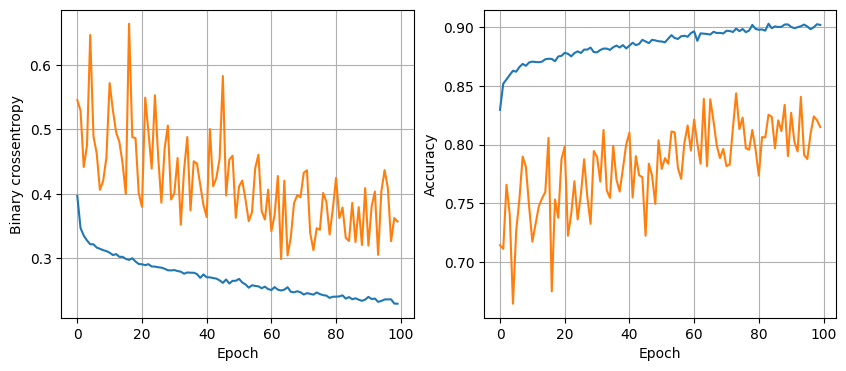

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8601 - loss: 0.3594
Training with 32 nodes, dropout 0, learning rate 0.01 and batch size 128...


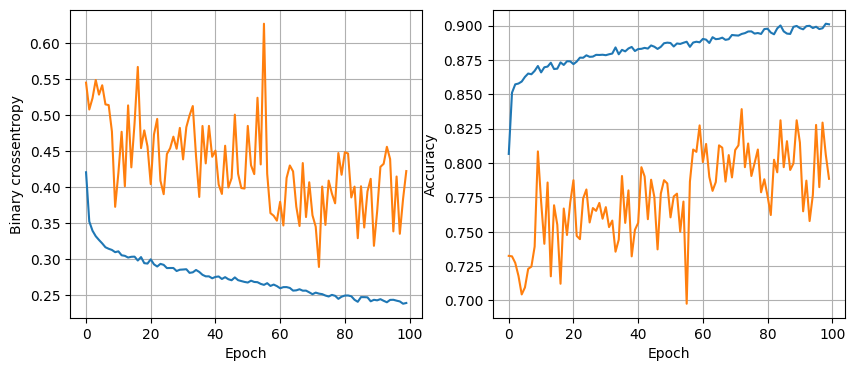

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8749 - loss: 0.3492
Training with 32 nodes, dropout 0, learning rate 0.005 and batch size 32...


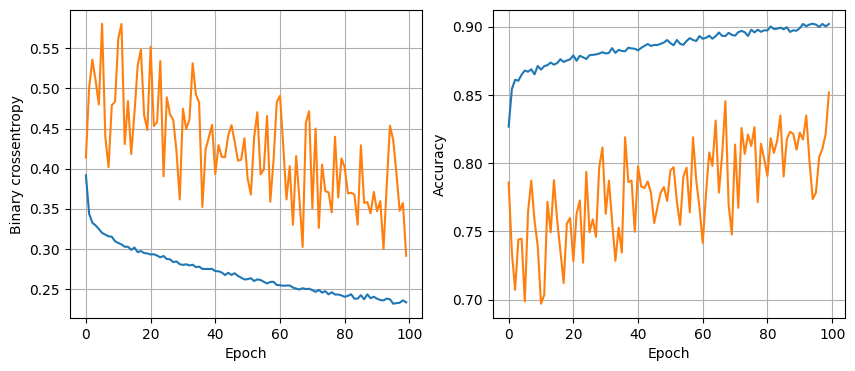

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8714 - loss: 0.3342
Training with 32 nodes, dropout 0, learning rate 0.005 and batch size 64...


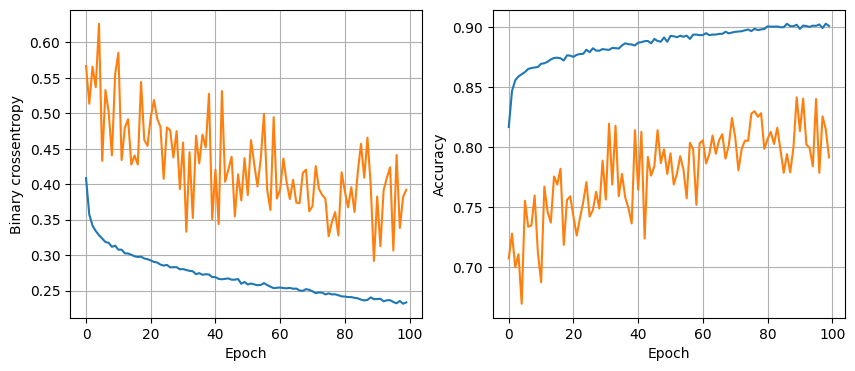

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8795 - loss: 0.3124
Training with 32 nodes, dropout 0, learning rate 0.005 and batch size 128...


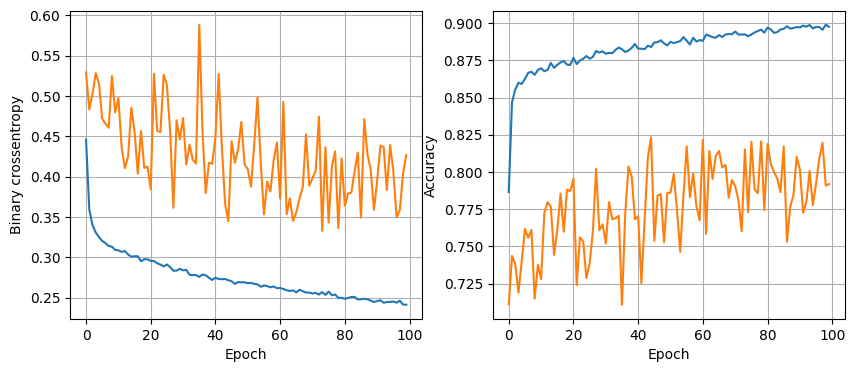

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8712 - loss: 0.3298
Training with 32 nodes, dropout 0, learning rate 0.001 and batch size 32...


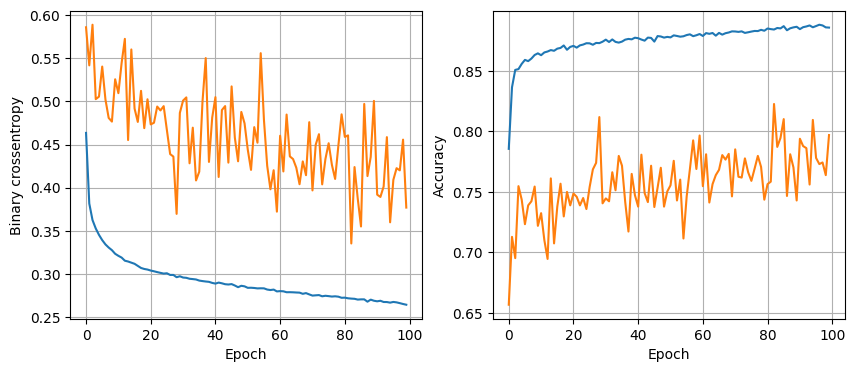

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8762 - loss: 0.2953
Training with 32 nodes, dropout 0, learning rate 0.001 and batch size 64...


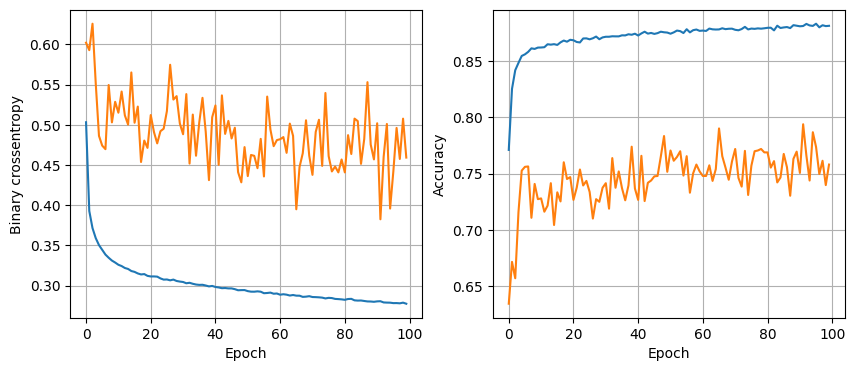

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8784 - loss: 0.3003
Training with 32 nodes, dropout 0, learning rate 0.001 and batch size 128...


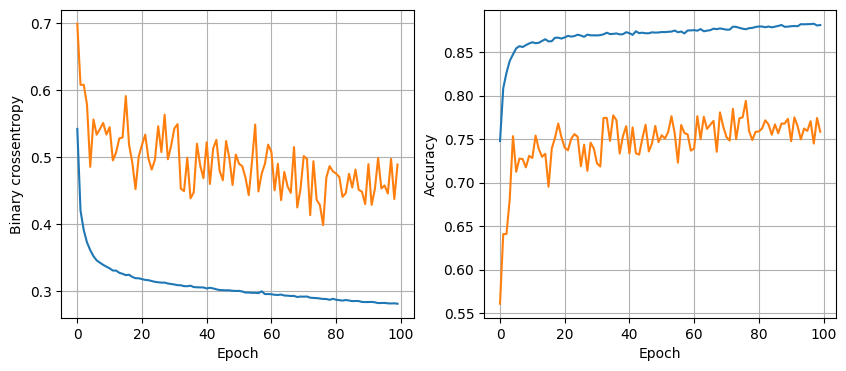

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8815 - loss: 0.2967
Training with 32 nodes, dropout 0.2, learning rate 0.01 and batch size 32...


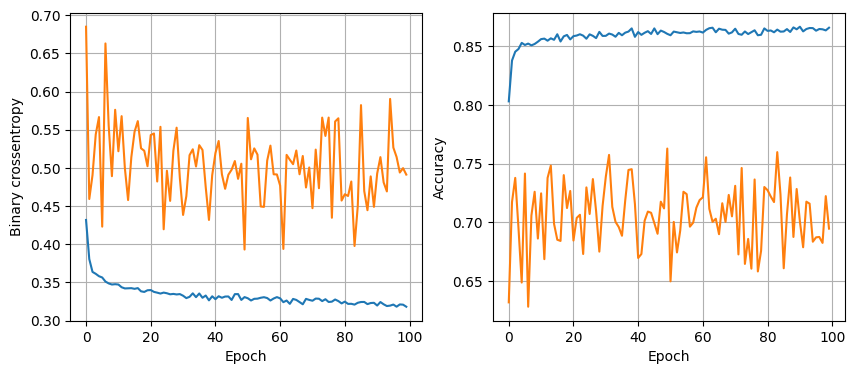

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8836 - loss: 0.3003
Training with 32 nodes, dropout 0.2, learning rate 0.01 and batch size 64...


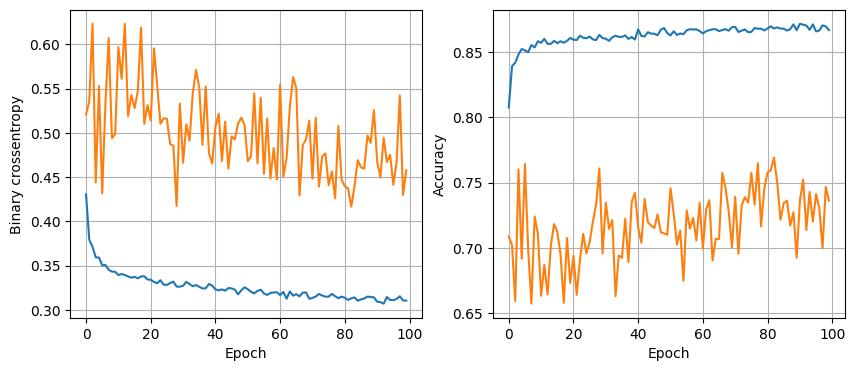

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8789 - loss: 0.2974
Training with 32 nodes, dropout 0.2, learning rate 0.01 and batch size 128...


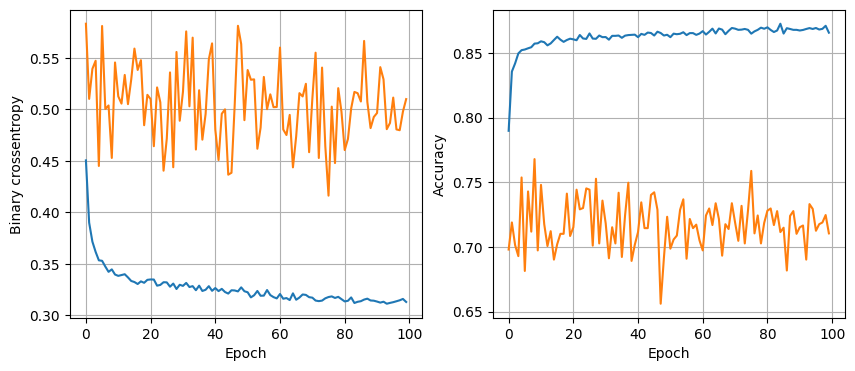

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8846 - loss: 0.2811
Training with 32 nodes, dropout 0.2, learning rate 0.005 and batch size 32...


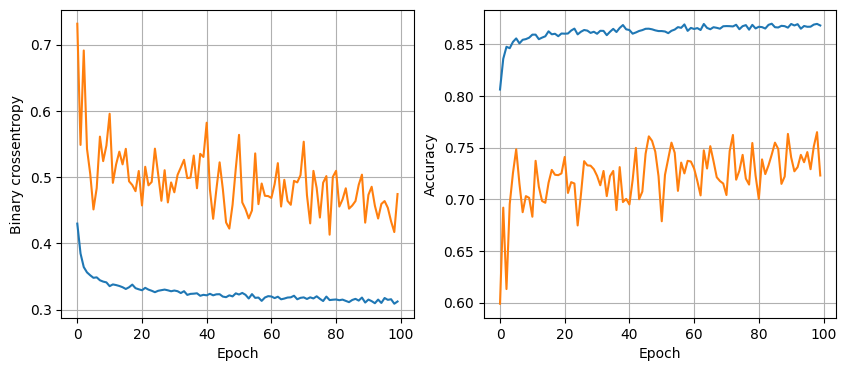

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8838 - loss: 0.2848
Training with 32 nodes, dropout 0.2, learning rate 0.005 and batch size 64...


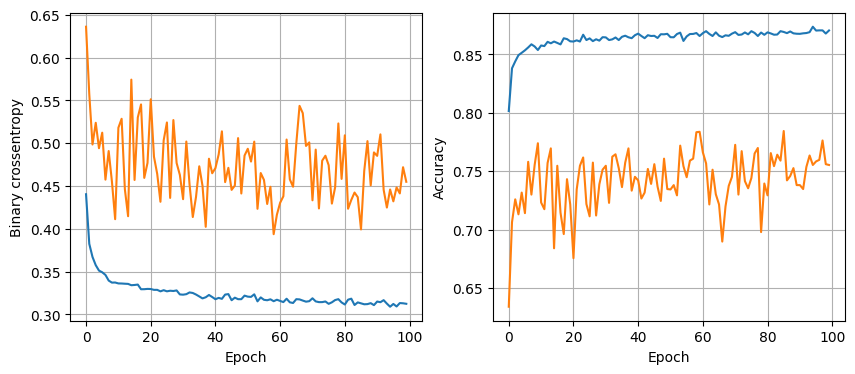

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8877 - loss: 0.2868
Training with 32 nodes, dropout 0.2, learning rate 0.005 and batch size 128...


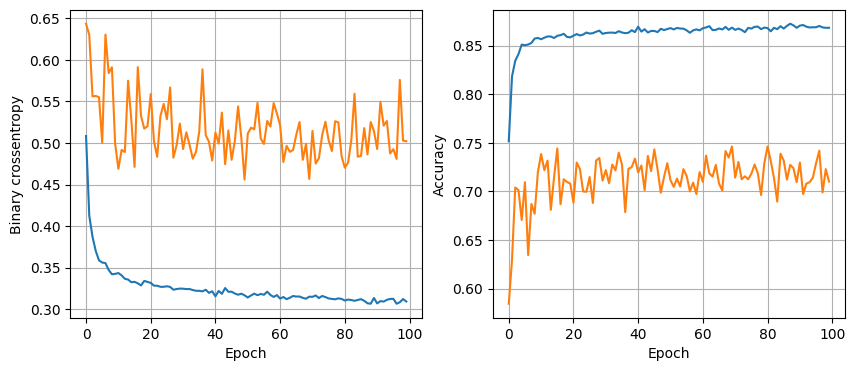

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8829 - loss: 0.2867
Training with 32 nodes, dropout 0.2, learning rate 0.001 and batch size 32...


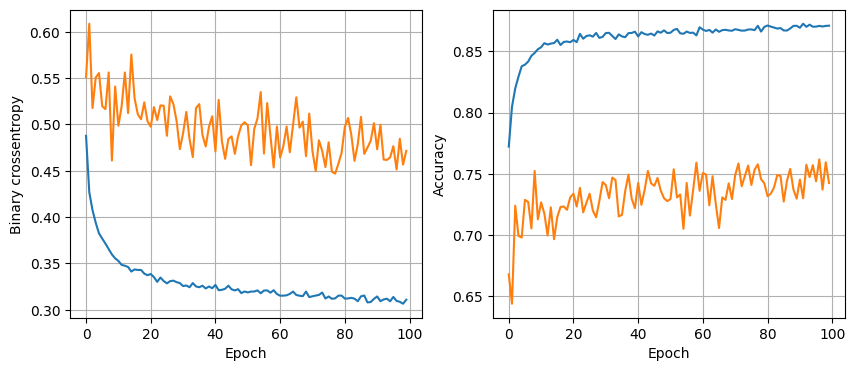

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8867 - loss: 0.2826
Training with 32 nodes, dropout 0.2, learning rate 0.001 and batch size 64...


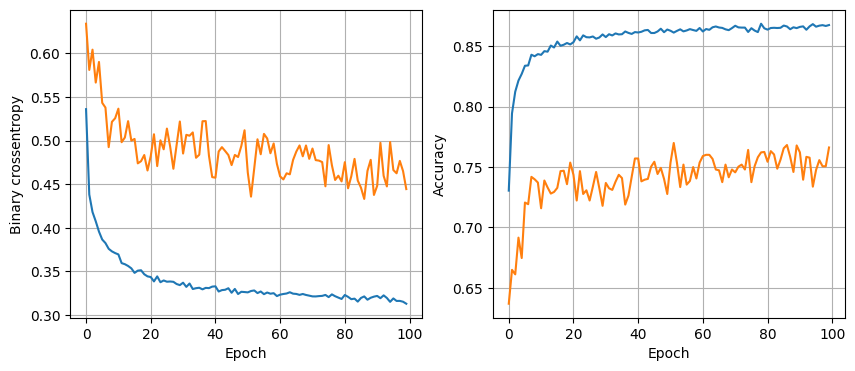

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8782 - loss: 0.2941
Training with 32 nodes, dropout 0.2, learning rate 0.001 and batch size 128...


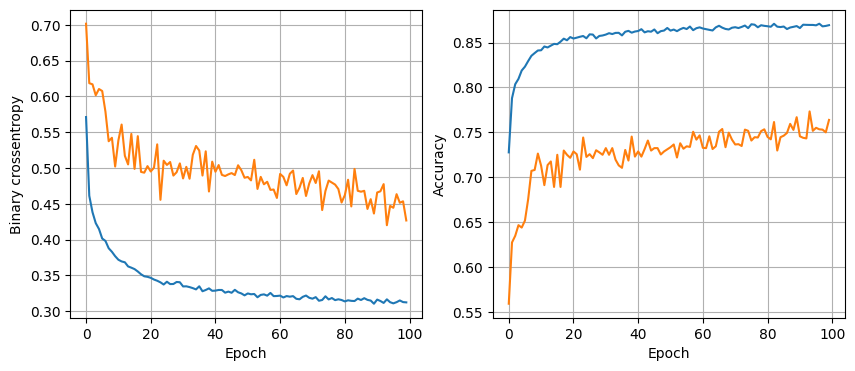

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8813 - loss: 0.2891
Training with 64 nodes, dropout 0, learning rate 0.01 and batch size 32...


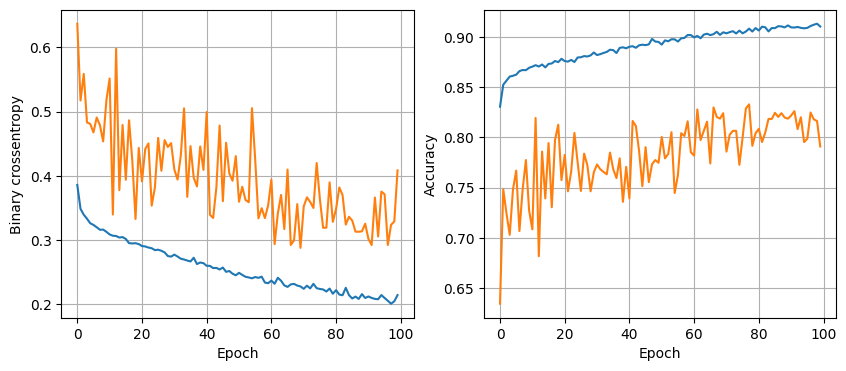

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8614 - loss: 0.4765
Training with 64 nodes, dropout 0, learning rate 0.01 and batch size 64...


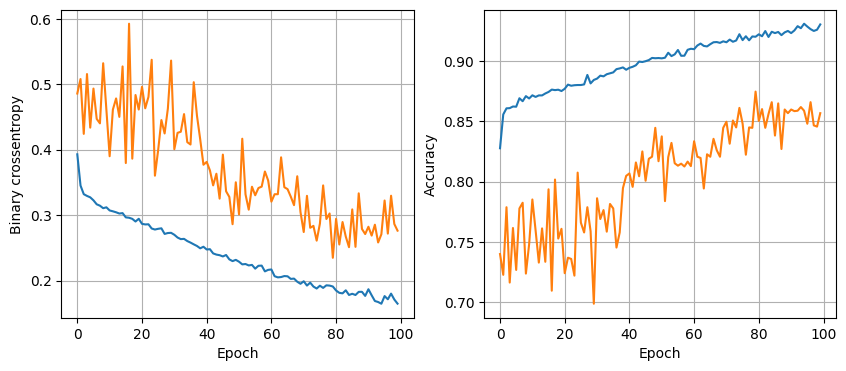

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8708 - loss: 0.4827
Training with 64 nodes, dropout 0, learning rate 0.01 and batch size 128...


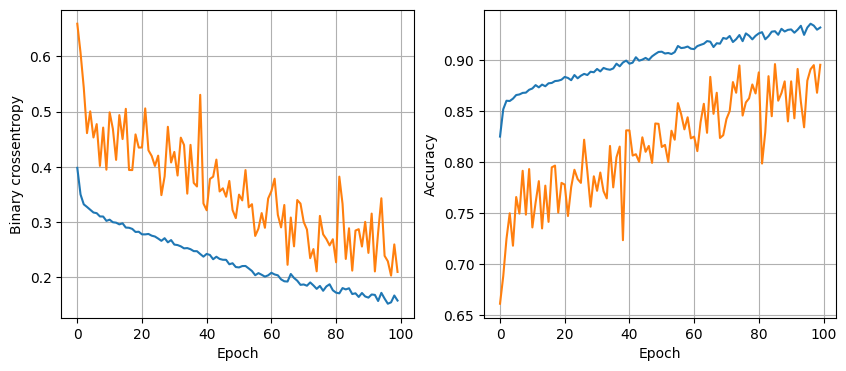

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8563 - loss: 0.5165
Training with 64 nodes, dropout 0, learning rate 0.005 and batch size 32...


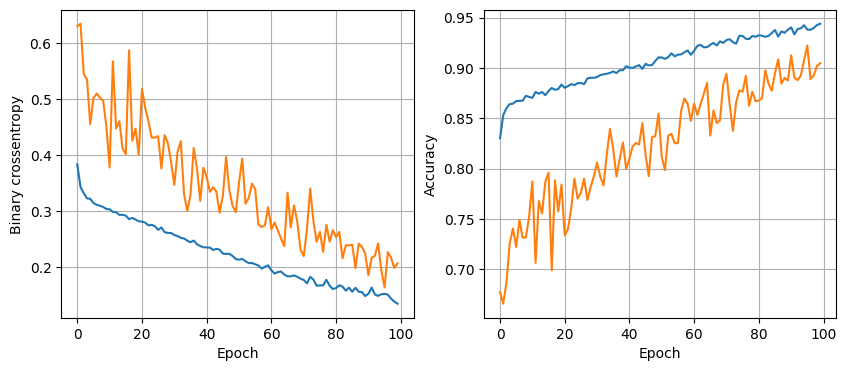

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8631 - loss: 0.5409
Training with 64 nodes, dropout 0, learning rate 0.005 and batch size 64...


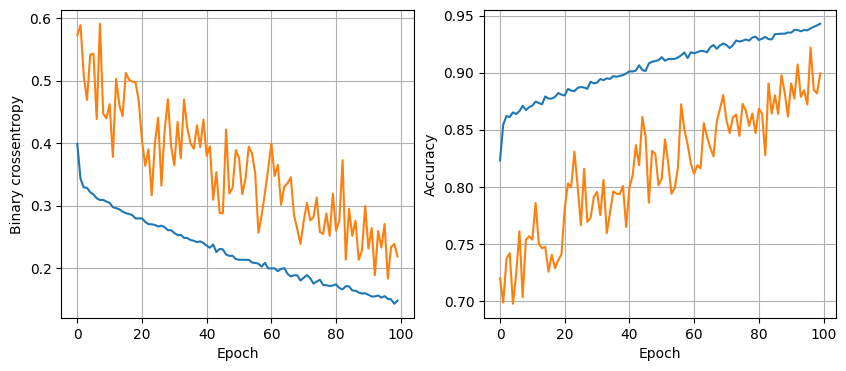

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8654 - loss: 0.4591
Training with 64 nodes, dropout 0, learning rate 0.005 and batch size 128...


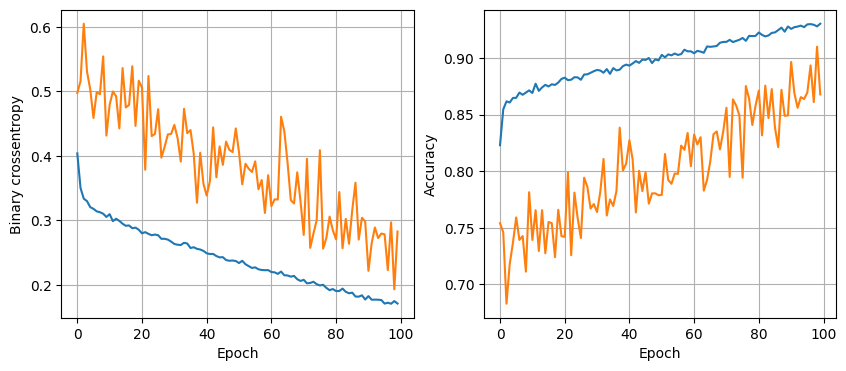

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8641 - loss: 0.4024
Training with 64 nodes, dropout 0, learning rate 0.001 and batch size 32...


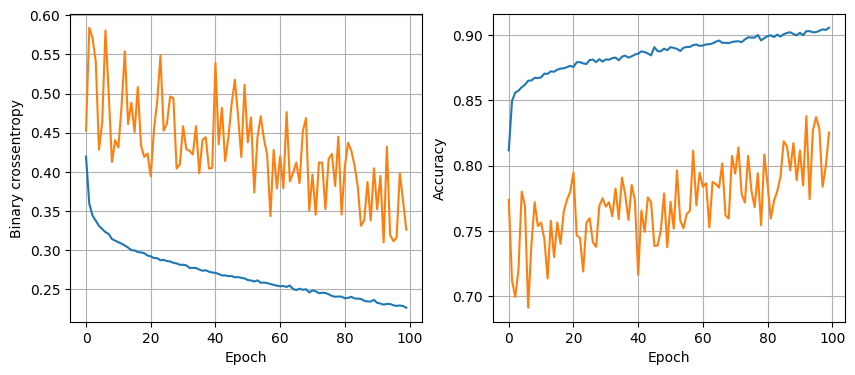

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8794 - loss: 0.3188
Training with 64 nodes, dropout 0, learning rate 0.001 and batch size 64...


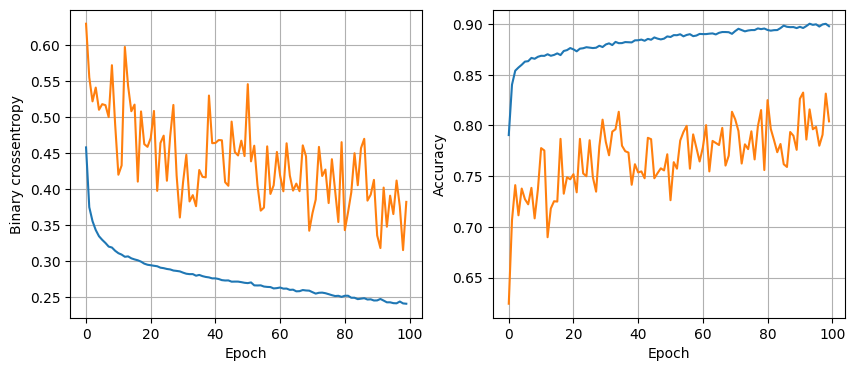

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8700 - loss: 0.3078
Training with 64 nodes, dropout 0, learning rate 0.001 and batch size 128...


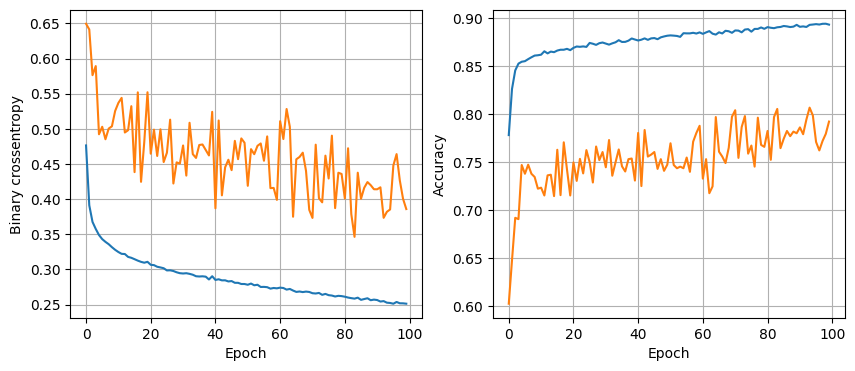

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8818 - loss: 0.3010
Training with 64 nodes, dropout 0.2, learning rate 0.01 and batch size 32...


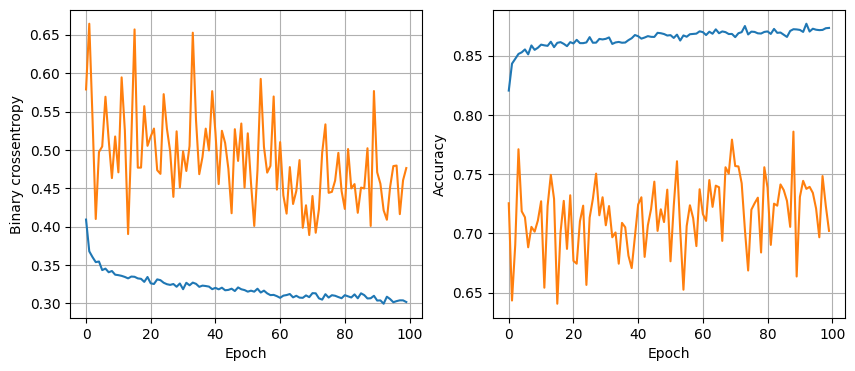

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8856 - loss: 0.2945
Training with 64 nodes, dropout 0.2, learning rate 0.01 and batch size 64...


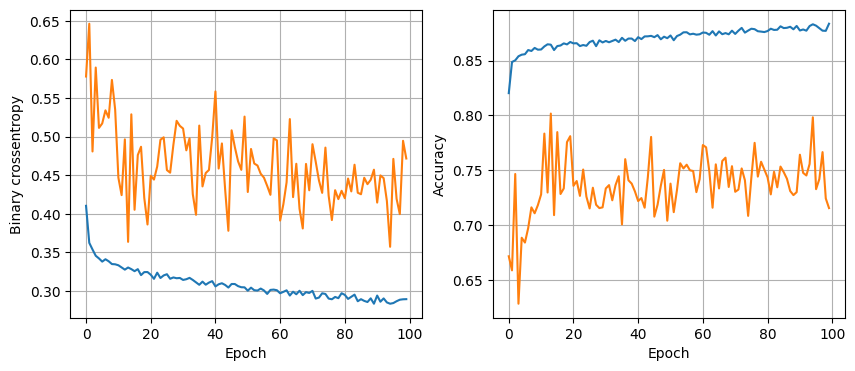

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8799 - loss: 0.2870
Training with 64 nodes, dropout 0.2, learning rate 0.01 and batch size 128...


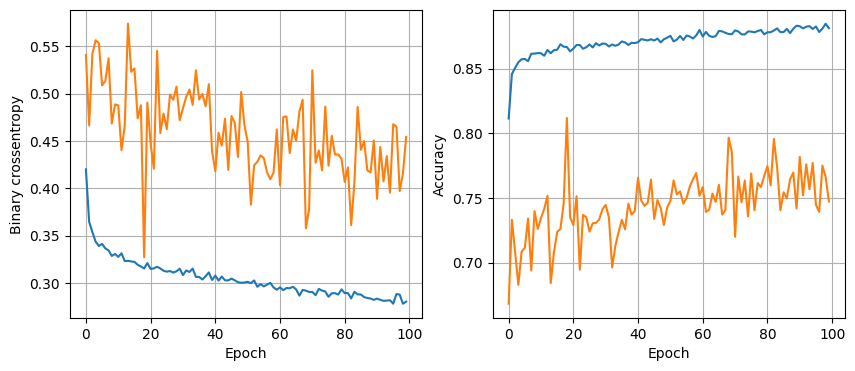

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8908 - loss: 0.2771
Training with 64 nodes, dropout 0.2, learning rate 0.005 and batch size 32...


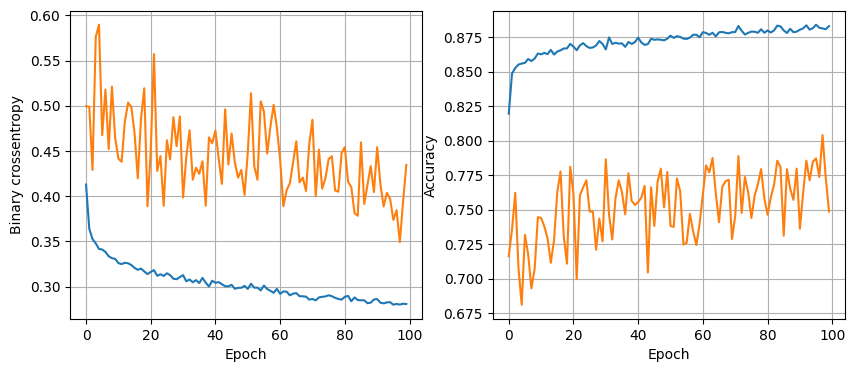

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8846 - loss: 0.2813
Training with 64 nodes, dropout 0.2, learning rate 0.005 and batch size 64...


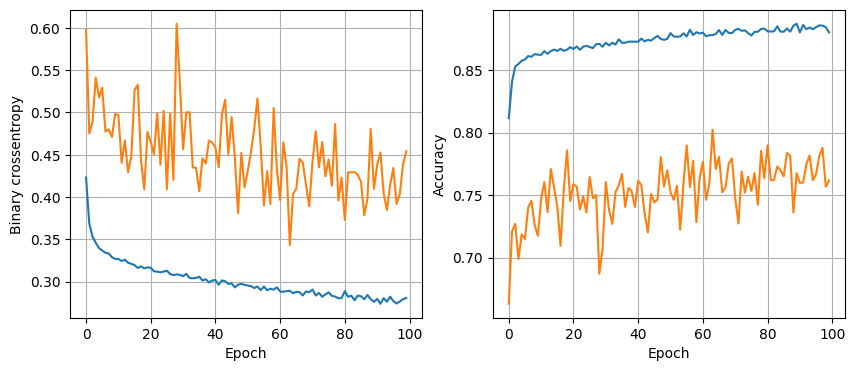

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8931 - loss: 0.2742
Training with 64 nodes, dropout 0.2, learning rate 0.005 and batch size 128...


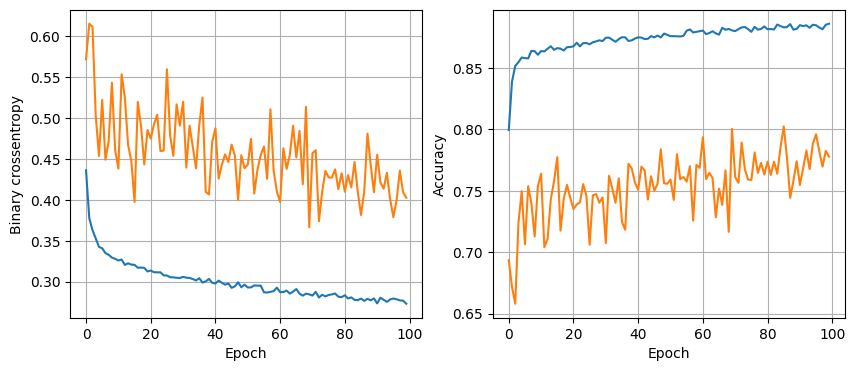

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8881 - loss: 0.2841
Training with 64 nodes, dropout 0.2, learning rate 0.001 and batch size 32...


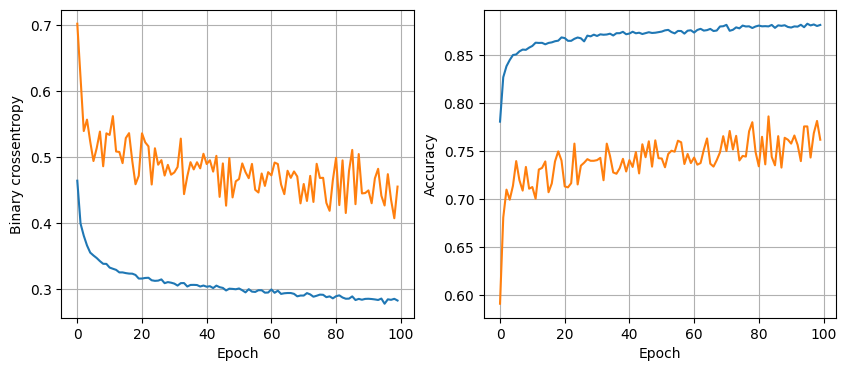

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8834 - loss: 0.2809
Training with 64 nodes, dropout 0.2, learning rate 0.001 and batch size 64...


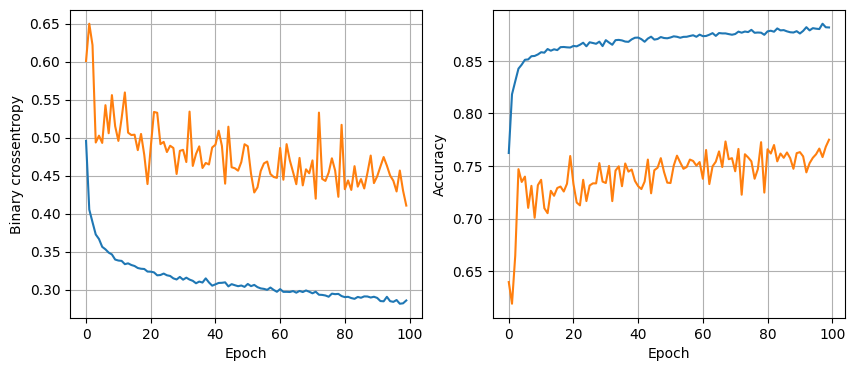

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8870 - loss: 0.2790
Training with 64 nodes, dropout 0.2, learning rate 0.001 and batch size 128...


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8858 - loss: 0.2834


In [ ]:
least_val_loss = float('inf')
Best_model = None
epochs = 100
for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32,64,128]:
        print(f"Training with {num_nodes} nodes, dropout {dropout_prob}, learning rate {lr} and batch size {batch_size}...")
        model,history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          Best_model = model


In [ ]:
y_pred = Best_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step


In [ ]:
y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.82      1327
           1       0.88      0.94      0.91      2477

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

